In [1]:
import dlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [2]:
# Load model

In [22]:
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor("./trained/shape_predictor_5_face_landmarks.dat")
# sp = dlib.shape_predictor("./trained/shape_predictor_68_face_landmarks.dat")

In [4]:
# Load image

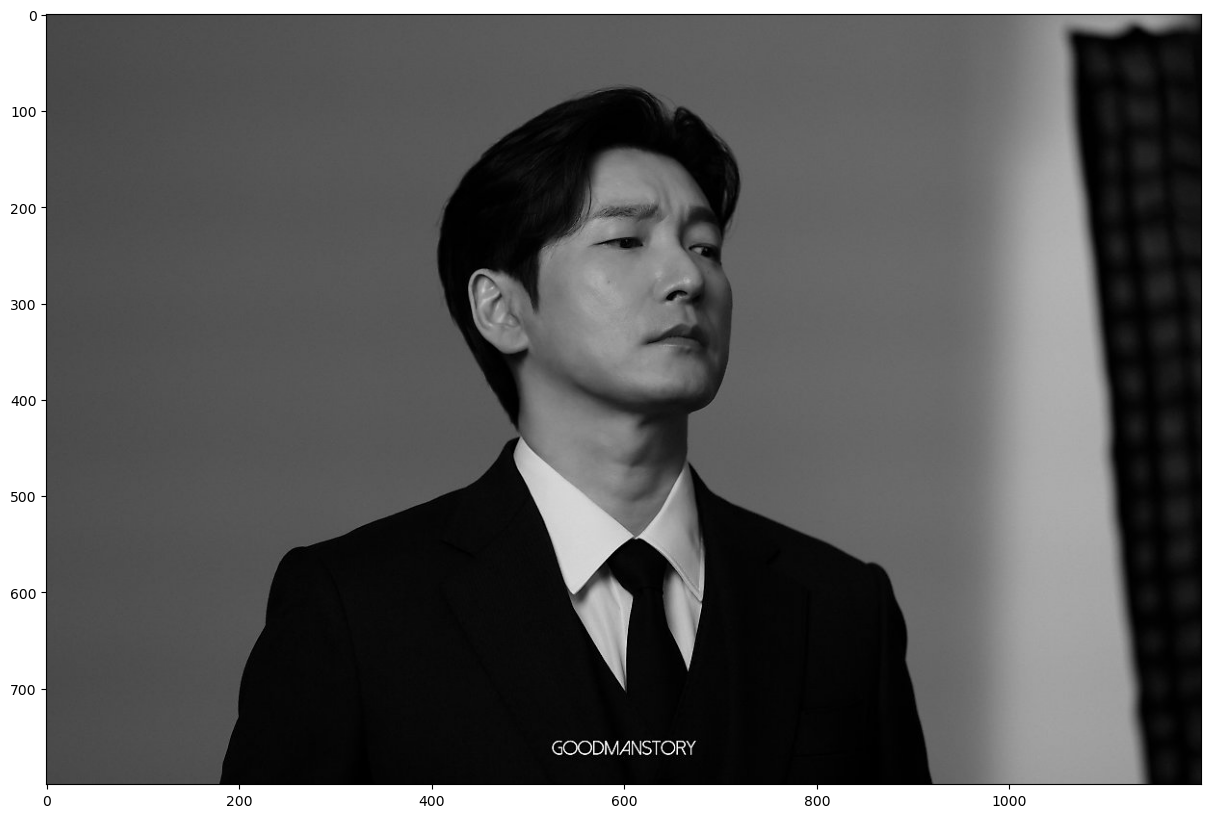

In [5]:
img = dlib.load_rgb_image('./trained/lover.jpg')

plt.figure(figsize=(16, 10))
plt.imshow(img)

In [6]:
# Processing to extract facial parts
imgs = img.copy()
dets = detector(imgs, 1)
print(dets)

rectangles[[(538, 167) (761, 390)]]


In [7]:
# Bounding Box processing of extracted face area


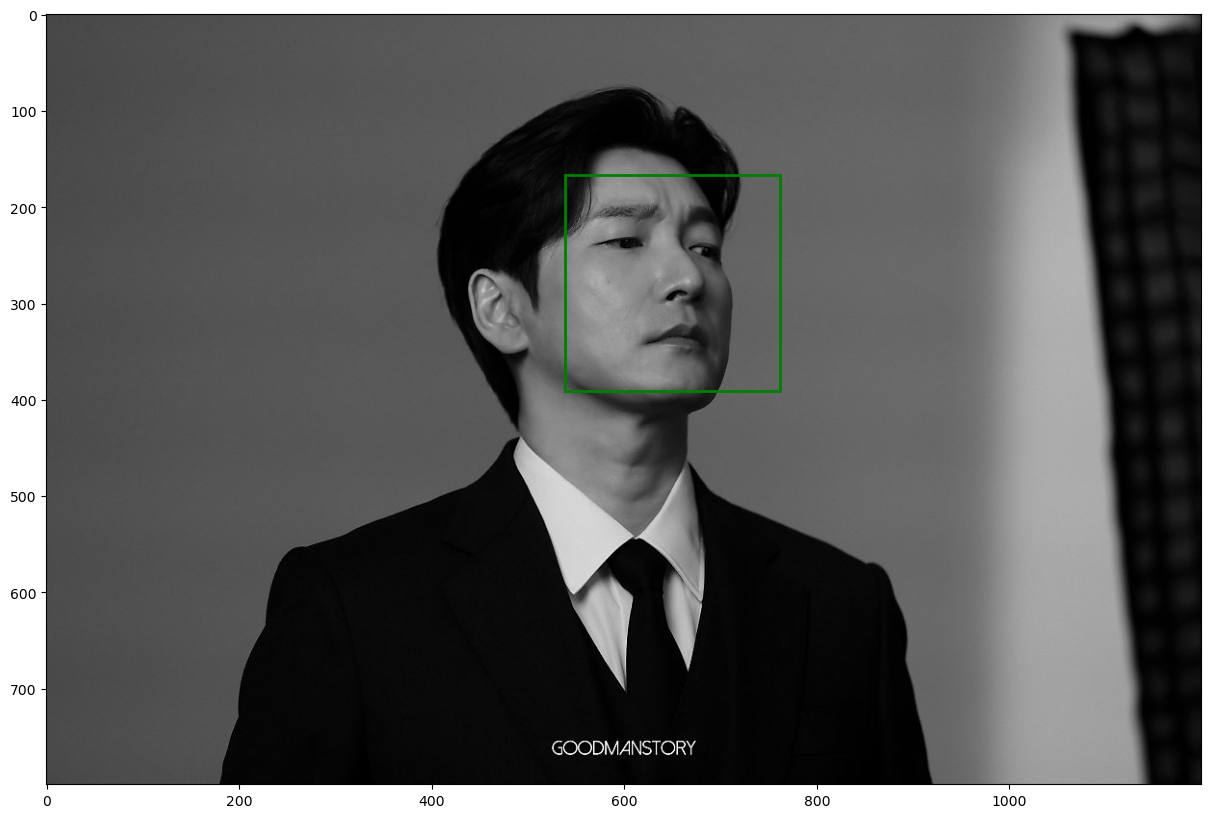

In [12]:
fig, ax = plt.subplots(1, figsize = (16, 10))

for det in dets:
    x, y, w, h = det.left(), det.top(), det.width(), det.height() 
    rectangle = patches.Rectangle(
        (x, y), w, h, 
        linewidth = 2, 
        edgecolor = 'g',
        facecolor = 'none'
    )
    ax.add_patch(rectangle)

ax.imshow(imgs)

In [9]:
# Extract the LANDMARK of the face

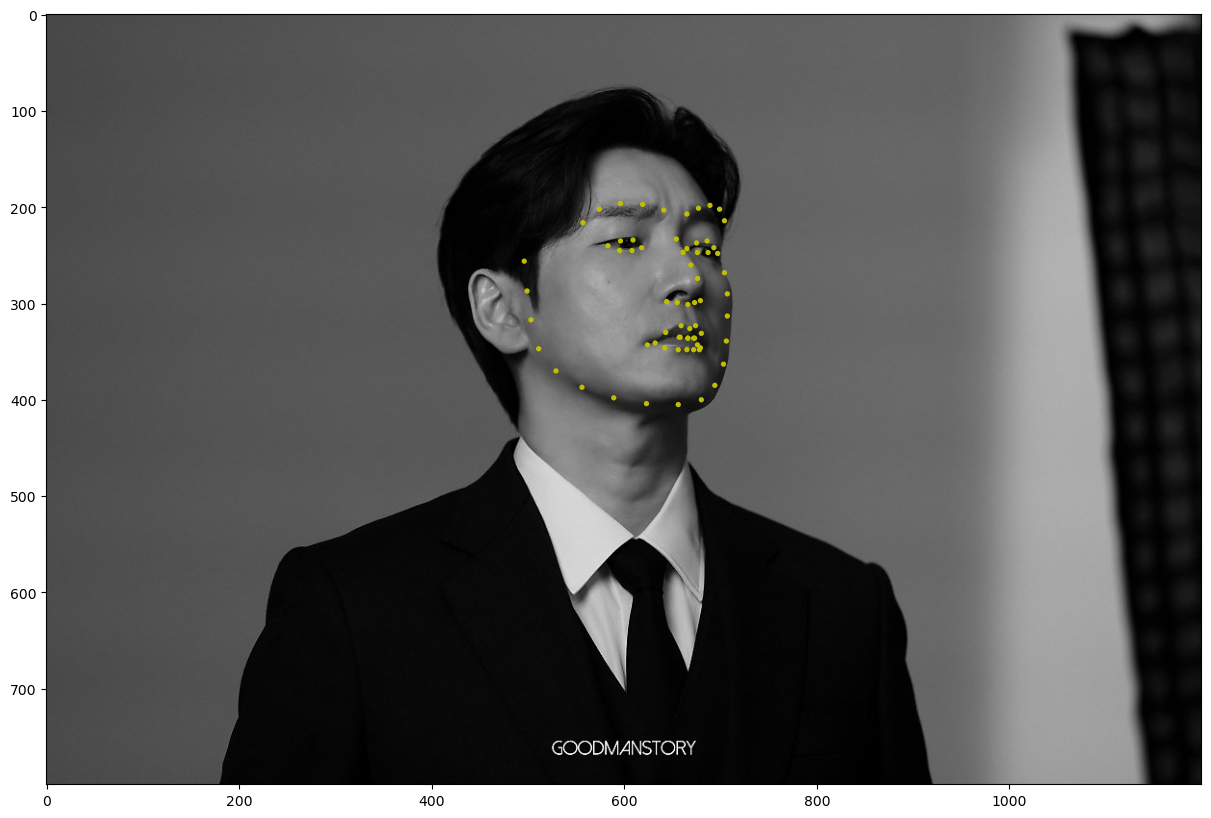

In [21]:
fig, ax = plt.subplots(1, figsize = (16, 10))
objects = dlib.full_object_detections()

for det in dets:
    faceDots = sp(img, det)
    objects.append(faceDots)

    for point in faceDots.parts():
        # 점 그리는 처리
        circle = patches.Circle(
            (point.x, point.y),
            radius = 2,
            edgecolor = 'y',
            facecolor = 'y'
        )
        ax.add_patch(circle)

ax.imshow(imgs)

In [13]:
# Face ALIGNMENT processing

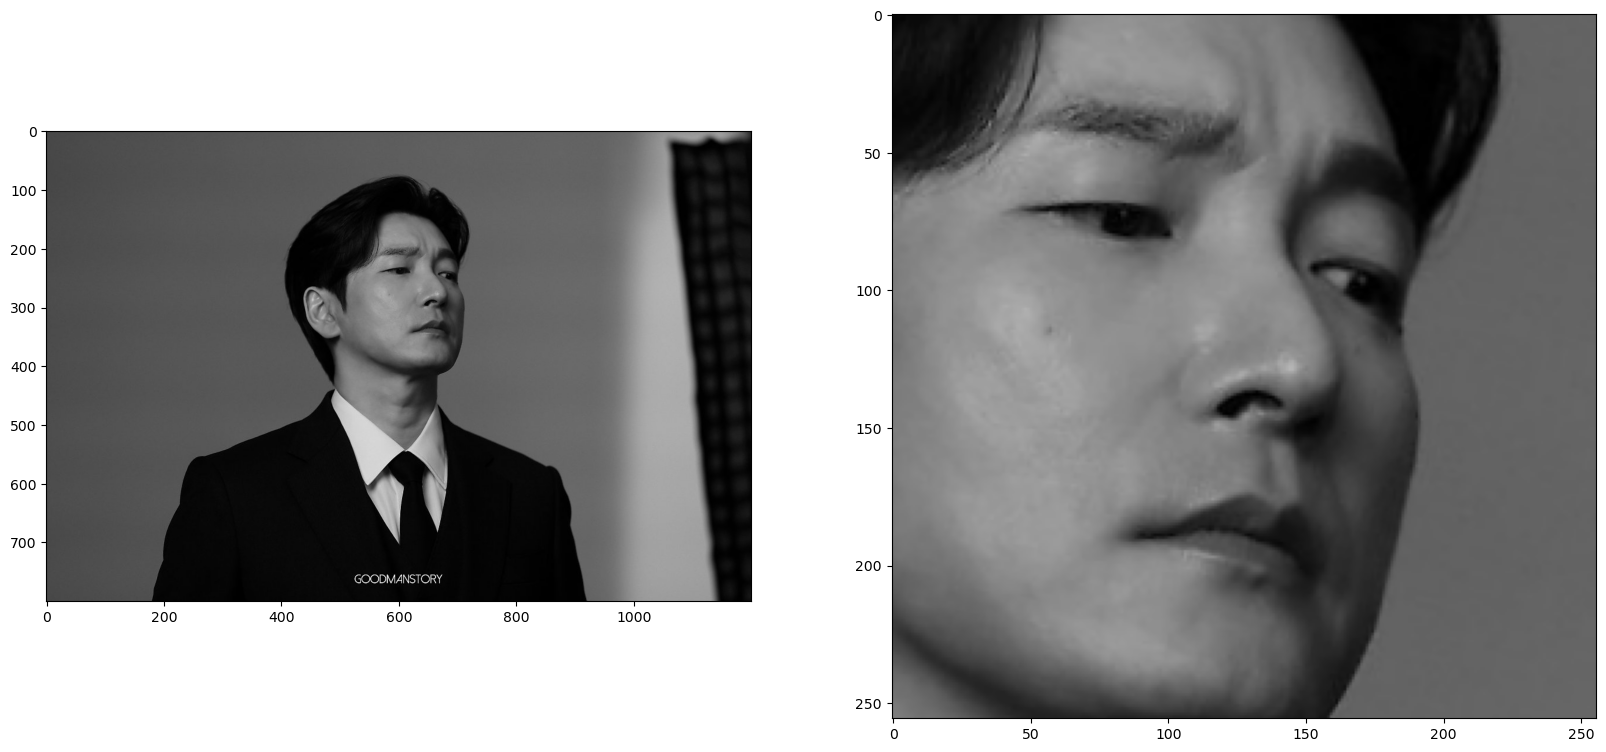

In [18]:
faces = dlib.get_face_chips(img, objects, size = 256, padding = 0.3)

fig, axes = plt.subplots(1, len(faces) + 1, figsize = (20, 10))
axes[0].imshow(img)

for i, face in enumerate(faces):
    axes[i + 1].imshow(face)